In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [27]:
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Data Preparation

In [28]:
df = pd.get_dummies(df, drop_first = True)
df[['card_yes', 'owner_yes', 'selfemp_yes']] = df[['card_yes', 'owner_yes', 'selfemp_yes']].astype(int)
df.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


## Gaussian Mixture Model 

Text(0.5, 0, 'Number of Components/Clusters')

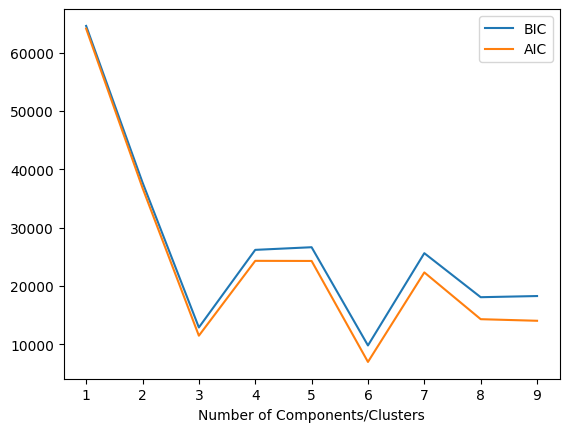

In [29]:
#Finding optimal number of clusters
#Preparation
n_components = np.arange(1,10)

#Create GMM Model
models = [GaussianMixture(n_components= n,
                                 random_state = 1502).fit(df) for n in n_components]

#Plot
plt.plot(n_components, 
        [m.bic(df) for m in models],
        label = 'BIC')
plt.plot(n_components,
        [m.aic(df) for m in models],
        label = 'AIC')
plt.legend()
plt.xlabel("Number of Components/Clusters")

In [30]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 3,
                        random_state = 1502).fit(df)

## Interpretation 

In [31]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster[:2]

0    1
1    1
dtype: int64

In [32]:
df['cluster'] = cluster
df

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0,1
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0,1
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0,1
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0,1
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,1,1,0,1
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,0,0,0,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,1,1,0,1
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,1,0,1,2


In [33]:
#Check how many people per cluster
df.cluster.value_counts()

cluster
1    720
2    303
0    296
Name: count, dtype: int64

In [34]:
#Interpretation
pd.DataFrame(model.means_,
            columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000
2,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921


In [ ]:
#Names
#Cluster 0: Non-Credit Users
#Cluster 1: Young Employees
#Cluster 2: Successful Entrepreneus